<a href="https://colab.research.google.com/github/caeruleaphile/PFA_ML_24/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Step 1 : Importing Libraries and Loading Datasets.
```



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored as style
from matplotlib import font_manager

In [ ]:
# Lire le fichier CSV
main_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv", low_memory=False)

# Afficher les premières lignes du DataFrame
main_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0




```
# Step 2: Data Preprocessing & Preparing Datasets.
```



In [ ]:
# Check for missing values in each column
missing_values = main_df.isna().sum()

# Display the count of missing values per column
print(missing_values)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
main_df.isnull().values.any()

False

In [ ]:
#Checking info of our datasets
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#Observing Statistical Distribution of Datasets...
main_df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


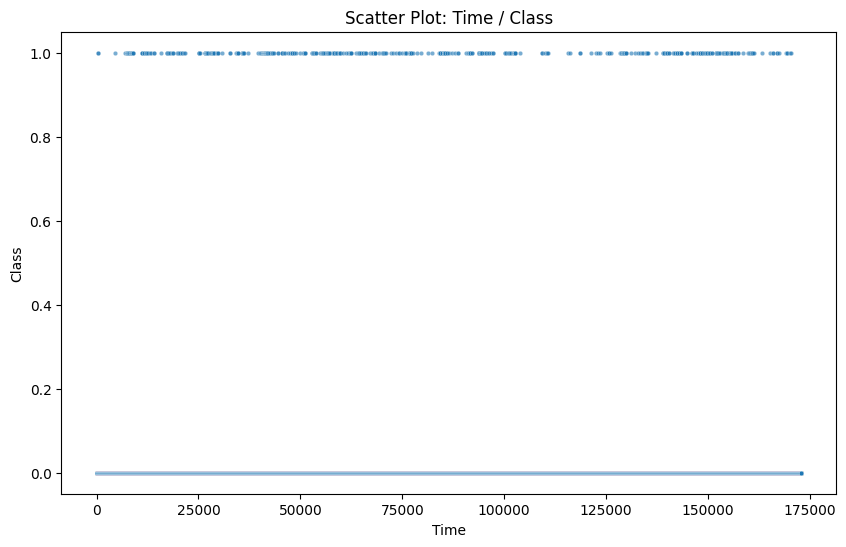

In [ ]:
# Scatter plot de Time / Class
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Class', data=main_df, alpha=0.6, s=10)
plt.title("Scatter Plot: Time / Class")
plt.xlabel("Time")
plt.ylabel("Class")
plt.show()



```
# Puisque la classe reste constante, on peut en déduire qu'il n'y a pas de
# corrélation entre le temps et la classe.
# Autrement dit, le temps n'affecte pas la classe de l'événement observé.
```



In [ ]:
# Suppression de la colonne "Time"
# axis =1  ===> colonne
# axis =0  ===> ligne
main_df.drop('Time', axis=1, inplace=True)

In [ ]:
# Séparation des caractéristiques (features) et de la cible (target)
# x == features
# y == target
X = main_df.drop('Class', axis=1)
y = main_df['Class']
X.shape, y.shape

((284807, 29), (284807,))

In [ ]:
# Standardisation de 'Amount' en utilisant StandardScaler de Scikit-learn
temp_df = main_df.copy()
# standardiser les données en supprimant la moyenne
# et en ajustant l'échelle à une variance unitaire.
# consiste à transformer des données pour avoir une
# moyenne de 0 et un écart-type de 1. Cela signifie
# que les données sont centrées autour de zéro, avec
# une distribution qui a une variance unitaire.

standard = StandardScaler()
amount = temp_df['Amount'].values
temp_df['Amount'] = standard.fit_transform(amount.reshape(-1,1))
X_scaled = temp_df.drop('Class', axis=1)
y_scaled = temp_df['Class']
X_scaled.shape, y_scaled.shape

((284807, 29), (284807,))

In [ ]:
main_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0




```
# Step 3: Exploratoty Data Analysis(EDA) & Visualization.
```



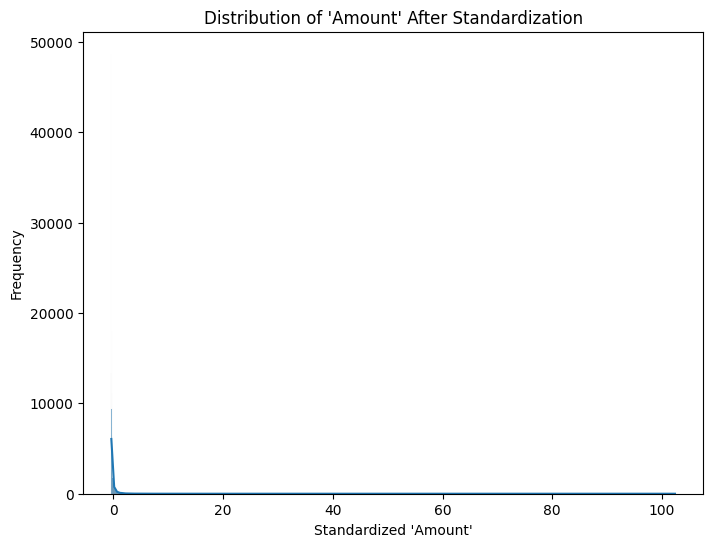

In [ ]:
# Histogram to check the distribution of 'Amount' after standardization
plt.figure(figsize=(8, 6))
sns.histplot(X_scaled['Amount'], kde=True)
plt.title("Distribution of 'Amount' After Standardization")
plt.xlabel("Standardized 'Amount'")
plt.ylabel("Frequency")
plt.show()

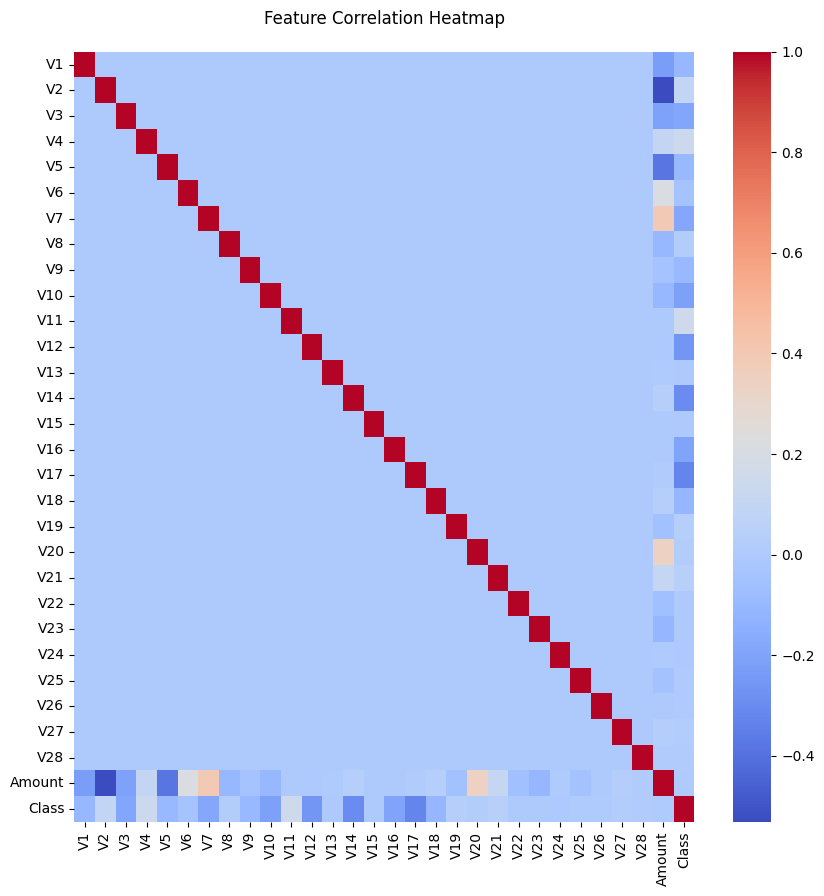

In [ ]:
plt.figure(figsize=(10, 10))
corr_matrix = main_df.corr()
sns.heatmap(corr_matrix, annot= False, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='None')
plt.title('Feature Correlation Heatmap', pad=20)
plt.show()





```
# Step 4: Handling Imbalanced Datasets
```





```
# Resampling( Undersampling and Oversampling )
```



In [ ]:
# OVERSAMPLING
# Checking the class distribution
class_counts = main_df['Class'].value_counts()
print("Class distribution:")
print(class_counts)


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority = main_df[(main_df['Class']==0)]
df_minority = main_df[(main_df['Class']==1)]

# Upsample the minority class
df_minority_oversampled = resample(df_minority,
                                 replace=True,
                                 n_samples=284315,
                                 random_state=42)
# Combine majority class with upsampled minority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])
df_oversampled.Class.value_counts()



Class
1    284315
0    284315
Name: count, dtype: int64

In [ ]:
# final sampled dataset :
X_oversampled = df_oversampled.drop('Class', axis=1)
y_oversampled = df_oversampled['Class']
X_oversampled.shape, y_oversampled.shape

((568630, 29), (568630,))

In [ ]:
# Distribution des classes après oversampling
class_counts_after = df_oversampled['Class'].value_counts()
print("Distribution des classes après oversampling:")
print(class_counts_after)


Distribution des classes après oversampling:
Class
1    284315
0    284315
Name: count, dtype: int64


In [ ]:
# UNDERSAMPLING :
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(X, y)
print(f"The number of Classes before the fit {Counter(y)}")
print(f"The number of Classes after the fit {Counter(y_undersampled)}")

The number of Classes before the fit Counter({0: 284315, 1: 492})
The number of Classes after the fit Counter({0: 492, 1: 492})


In [ ]:
# SMOTE(Synthetic Minority Oversampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE

# Resampling the minority class. The strategy can be changed as required.

sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.

X_smote, y_smote = sm.fit_resample(main_df.drop('Class', axis=1), main_df['Class'])
smote_df = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
X_smote.shape

(568630, 29)

In [ ]:
print(smote_df['Class'].value_counts())


Class
0    284315
1    284315
Name: count, dtype: int64


In [ ]:
# Calculer le pourcentage de chaque classe
class_percentages = smote_df['Class'].value_counts(normalize=True) * 100

# Afficher les pourcentages
print("Pourcentages des classes après SMOTE:")
print(class_percentages)


Pourcentages des classes après SMOTE:
Class
0    50.0
1    50.0
Name: proportion, dtype: float64
